In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

barentsburg sj
taolanaro mg
baoqing cn
marsa matruh eg
barrow us
torbay ca
nikolskoye ru
tuatapere nz
flinders au
vaini to
taolanaro mg
upernavik gl
jamestown sh
voi ke
busselton au
tuktoyaktuk ca
carnarvon au
sarakhs ir
cayenne gf
hermanus za
maldonado uy
brae gb
acapulco mx
tilichiki ru
samusu ws
vaini to
roald no
busselton au
ribeira grande pt
albany au
pisco pe
nishihara jp
rawson ar
ushuaia ar
yulara au
bandar id
kununurra au
riberalta bo
mount gambier au
tuatapere nz
belmonte br
ushuaia ar
wanning cn
arraial do cabo br
linhares br
vershino-darasunskiy ru
jamestown sh
jamestown sh
clyde river ca
rikitea pf
matay eg
boyolangu id
fort morgan us
ushuaia ar
grand gaube mu
kemijarvi fi
biltine td
toliary mg
geraldton au
kapaa us
cape town za
nikolskoye ru
tuktoyaktuk ca
copiapo cl
punta arenas cl
ushuaia ar
hit iq
gilgit pk
mar del plata ar
cape town za
kembe cf
ippy cf
dikson ru
mataura pf
santa cruz cr
nikolskoye ru
bredasdorp za
hanna ca
nanortalik gl
qaanaaq gl
qaanaaq gl
kapaa us


soyo ao
khani ru
slobidka ua
rikitea pf
puerto ayora ec
hermanus za
vaini to
pevek ru
lavrentiya ru
chokurdakh ru
lata sb
samandag tr
marcona pe
halalo wf
feni bd
busselton au
hilo us
port alfred za
vila franca do campo pt
bengkulu id
la ronge ca
iqaluit ca
atuona pf
busselton au
crab hill bb
ust-kalmanka ru
saint george bm
linhai cn
hilo us
thompson ca
east london za
alofi nu
sobolevo ru
busselton au
san patricio mx
upernavik gl
victoria sc
mahebourg mu
dikson ru
mataura pf
rikitea pf
rikitea pf
atuona pf
vaini to
avarua ck
ushuaia ar
yellowknife ca
saint-philippe re
kipushi cd
turiacu br
east london za
lata sb
attawapiskat ca
verkh-usugli ru
mehran ir
galle lk
albany au
bull savanna jm
busselton au
rikitea pf
port elizabeth za
newton us
rikitea pf
saint-philippe re
komsomolskiy ru
auki sb
barrow us
kapaa us
asmara er
rikitea pf
mount gambier au
mataura pf
norman wells ca
utete tz
rikitea pf
bluff nz
broome au
havre-saint-pierre ca
hermanus za
khatanga ru
albany au
pevek ru
longyearby

kapaa us
busselton au
upernavik gl
torbay ca
saleaula ws
kegayli uz
cockburn town tc
rikitea pf
bathsheba bb
kuche cn
lorengau pg
bluff nz
hit iq
tuktoyaktuk ca
pangnirtung ca
sambava mg
albany au
provideniya ru
hermanus za
eureka us
san patricio mx
malartic ca
ponta do sol cv
marawi sd
busselton au
mataura pf
tuatapere nz
rikitea pf


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 13 | baoqing
Processing Record 4 of Set 13 | marsa matruh
Processing Record 5 of Set 13 | barrow
Processing Record 6 of Set 13 | torbay
Processing Record 7 of Set 13 | nikolskoye
Processing Record 8 of Set 13 | tuatapere
Processing Record 9 of Set 13 | flinders
Processing Record 10 of Set 13 | vaini
Processing Record 11 of Set 13 | upernavik
Processing Record 12 of Set 13 | jamestown
Processing Record 13 of Set 13 | voi
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | tuktoyaktuk
Processing Record 16 of Set 13 | carnarvon
Processing Record 17 of Set 13 | sarakhs
Processing Record 18 of Set 13 | cayenne
Processing Record 19 of Set 13 | hermanus
Processing Record 20 of Set 13 | maldonado
Processing Record 21 of Set 13 | brae
Processing 

Processing Record 37 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 38 of Set 16 | dunedin
Processing Record 39 of Set 16 | san patricio
Processing Record 40 of Set 16 | bethel
Processing Record 41 of Set 16 | banjar
Processing Record 42 of Set 16 | chelbasskaya
Processing Record 43 of Set 16 | mandalgovi
Processing Record 44 of Set 16 | asau
Processing Record 45 of Set 16 | la ronge
Processing Record 46 of Set 16 | calama
Processing Record 47 of Set 16 | iqaluit
Processing Record 48 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 16 | gaspe
City not found. Skipping...
Processing Record 50 of Set 16 | norman wells
Processing Record 1 of Set 17 | lincoln
Processing Record 2 of Set 17 | inhambane
Processing Record 3 of Set 17 | harper
Processing Record 4 of Set 17 | kailua
Processing Record 5 of Set 17 | marzuq
Processing Record 6 of Set 17 | fortuna
Processing Record 7 of Set 17 | hithadhoo
Processing Record 8 of Set 17 | omb

Processing Record 18 of Set 20 | asmara
Processing Record 19 of Set 20 | utete
Processing Record 20 of Set 20 | broome
Processing Record 21 of Set 20 | havre-saint-pierre
Processing Record 22 of Set 20 | vila velha
Processing Record 23 of Set 20 | were ilu
Processing Record 24 of Set 20 | narsaq
Processing Record 25 of Set 20 | boende
Processing Record 26 of Set 20 | naryan-mar
Processing Record 27 of Set 20 | lukovetskiy
Processing Record 28 of Set 20 | kavieng
Processing Record 29 of Set 20 | grojec
Processing Record 30 of Set 20 | labutta
City not found. Skipping...
Processing Record 31 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 20 | kismayo
Processing Record 33 of Set 20 | sciacca
Processing Record 34 of Set 20 | mutis
Processing Record 35 of Set 20 | vaitape
Processing Record 36 of Set 20 | flin flon
Processing Record 37 of Set 20 | southbridge
Processing Record 38 of Set 20 | gabi
Processing Record 39 of Set 20 | taksimo
Processing Record 40 of S

Processing Record 5 of Set 24 | paldiski
Processing Record 6 of Set 24 | tiverton
Processing Record 7 of Set 24 | agnibilekrou
Processing Record 8 of Set 24 | mayo
Processing Record 9 of Set 24 | buqayq
City not found. Skipping...
Processing Record 10 of Set 24 | acajutla
Processing Record 11 of Set 24 | warstein
Processing Record 12 of Set 24 | vilhena
Processing Record 13 of Set 24 | maghama
City not found. Skipping...
Processing Record 14 of Set 24 | wewak
Processing Record 15 of Set 24 | moron
Processing Record 16 of Set 24 | turukhansk
Processing Record 17 of Set 24 | sistranda
Processing Record 18 of Set 24 | angahuan
Processing Record 19 of Set 24 | kandrian
Processing Record 20 of Set 24 | dingle
Processing Record 21 of Set 24 | andenes
Processing Record 22 of Set 24 | urla
Processing Record 23 of Set 24 | cam ranh
Processing Record 24 of Set 24 | tamayong
Processing Record 25 of Set 24 | sibu
Processing Record 26 of Set 24 | ojuelos de jalisco
Processing Record 27 of Set 24 | 

In [43]:
len(city_data)

548

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baoqing,46.3317,132.2111,63.68,90,100,8.66,CN,2021-06-11 07:36:59
1,Marsa Matruh,31.3525,27.2453,75.40,73,40,5.75,EG,2021-06-11 07:37:00
2,Barrow,71.2906,-156.7887,32.02,93,90,5.75,US,2021-06-11 07:37:00
3,Torbay,47.6666,-52.7314,38.75,97,90,13.80,CA,2021-06-11 07:35:30
4,Nikolskoye,59.7035,30.7861,73.80,39,98,3.76,RU,2021-06-11 07:37:01
5,Tuatapere,-46.1333,167.6833,43.30,94,16,3.09,NZ,2021-06-11 07:37:02
6,Flinders,-34.5833,150.8552,57.20,80,67,7.00,AU,2021-06-11 07:37:02
7,Vaini,-21.2000,-175.2000,73.56,78,40,9.22,TO,2021-06-11 07:37:02
8,Upernavik,72.7868,-56.1549,33.26,85,2,5.66,GL,2021-06-11 07:37:03
9,Jamestown,42.0970,-79.2353,68.36,78,1,1.01,US,2021-06-11 07:37:03


In [45]:
new_column_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_reorder]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Baoqing,CN,2021-06-11 07:36:59,46.3317,132.2111,63.68,90,100,8.66
1,Marsa Matruh,EG,2021-06-11 07:37:00,31.3525,27.2453,75.40,73,40,5.75
2,Barrow,US,2021-06-11 07:37:00,71.2906,-156.7887,32.02,93,90,5.75
3,Torbay,CA,2021-06-11 07:35:30,47.6666,-52.7314,38.75,97,90,13.80
4,Nikolskoye,RU,2021-06-11 07:37:01,59.7035,30.7861,73.80,39,98,3.76


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

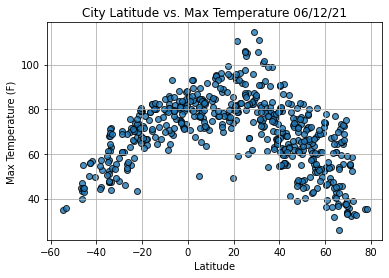

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

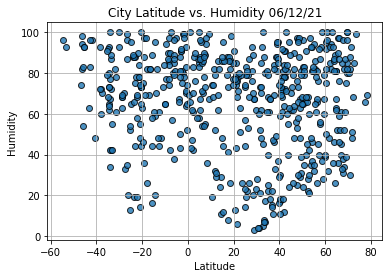

In [49]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

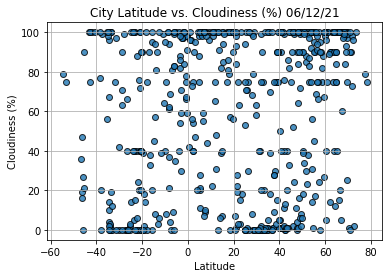

In [50]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

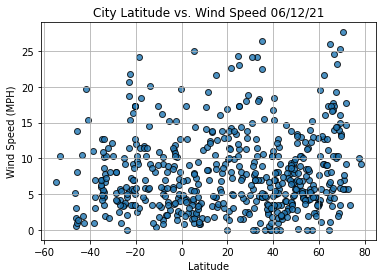

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]
index13

City                    Carnarvon
Country                        AU
Date          2021-06-11 07:37:05
Lat                      -24.8667
Lng                      113.6333
Max Temp                    71.67
Humidity                       65
Cloudiness                     14
Wind Speed                   9.22
Name: 13, dtype: object

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Baoqing,CN,2021-06-11 07:36:59,46.3317,132.2111,63.68,90,100,8.66
1,Marsa Matruh,EG,2021-06-11 07:37:00,31.3525,27.2453,75.40,73,40,5.75
2,Barrow,US,2021-06-11 07:37:00,71.2906,-156.7887,32.02,93,90,5.75
3,Torbay,CA,2021-06-11 07:35:30,47.6666,-52.7314,38.75,97,90,13.80
4,Nikolskoye,RU,2021-06-11 07:37:01,59.7035,30.7861,73.80,39,98,3.76


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

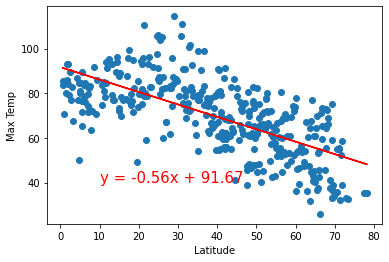

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


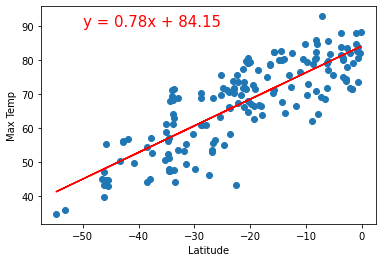

In [57]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

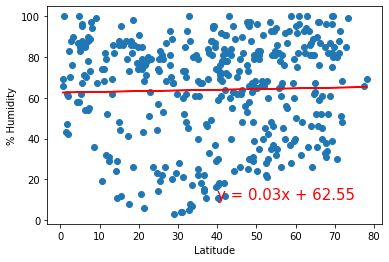

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

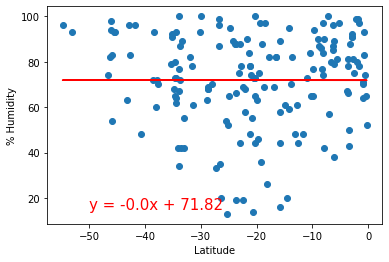

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

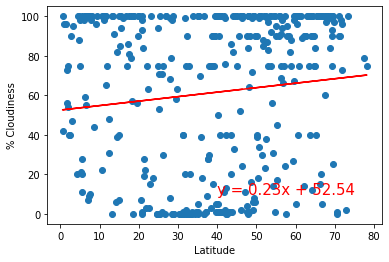

In [60]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

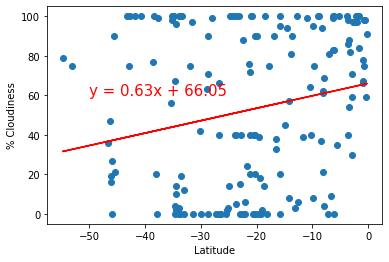

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

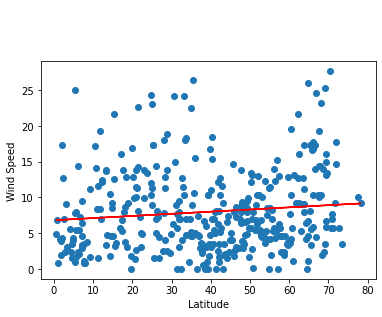

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

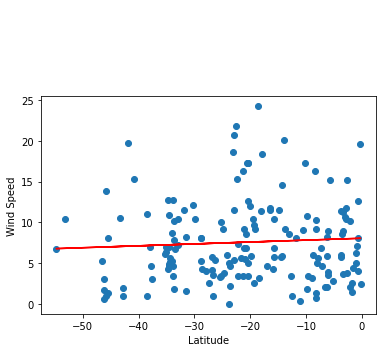

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))